# Pulls from my April $1^{st}$ talk

**Goal:** I *wanted* to be able to give a quick wip update last Thursday w/ the corresponding limits that I was seeing, but one of the open items was to look @ the pulls... so this is what I'm going to do here.

Although Sean has a function that plots the pulls and impacts, maybe for starters I'll just try to visualize the pulls here and can follow-up w/ the impacts (since some of these metrics were taking q a long time to run haha).


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.sys.path+= ['../RRevolution/code/','../PAG-opt/','../code/']
from analysis import getXhh
from utils import mcToYr, L
#from postprocess import calc_bstrap

from eventDisplays import rainbow_text

from plots import draw_SR, draw_VR, draw_CR

import logging
for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
pullDir = '../stats-results/dEta_cats/'

In [4]:
p_base = pd.read_csv(f'{pullDir}/ws-systs-HTcut-300.0-16-17-18-SM-HH-baseline_pulls.csv')
p_3inc = pd.read_csv(f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-3_bins_pulls.csv')
p_3cor = pd.read_csv(f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-corr-16-17-18-SM-HH-3_bins_pulls.csv')
p_3exl = pd.read_csv(f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-exl_rw_3_bins_pulls.csv')

In [5]:
figDir=f'figures/fullRun2'

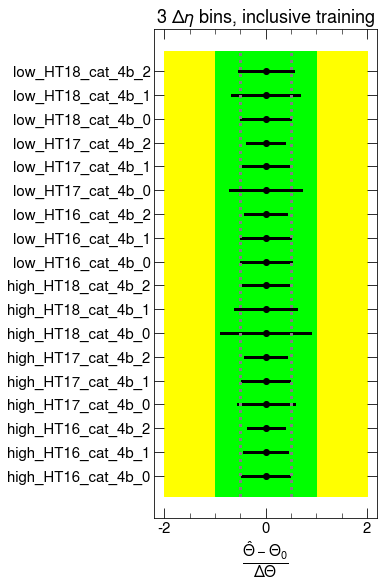

In [6]:
plt.figure(figsize=(4,9))

plt.errorbar(p_3inc[:18].pull,np.arange(18)[::-1],xerr=p_3inc[:18].err,
             marker='o',color='k',lw=0,elinewidth=3)

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='yellow')
plt.fill_betweenx(ylim,-1,1,color='lime')


plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('3 $\Delta \eta$ bins, inclusive training')

plt.yticks(np.arange(18),p_3inc[:18].label)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'grey',ls='dotted')
plt.plot([ 0.5]*2,ylim,'grey',ls='dotted')


plt.savefig(f'{figDir}/pulls_3_deta_hh_bins_incl_rw.pdf',bbox_inches='tight')

plt.show()

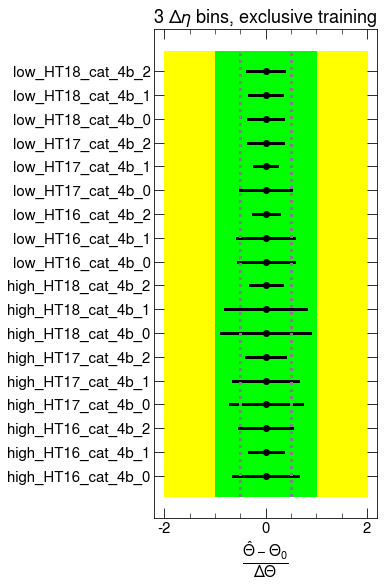

In [7]:
plt.figure(figsize=(4,9))

plt.errorbar(p_3exl[:18].pull,np.arange(18)[::-1],xerr=p_3exl[:18].err,
             marker='o',color='k',lw=0,elinewidth=3)

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='yellow')
plt.fill_betweenx(ylim,-1,1,color='lime')


plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('3 $\Delta \eta$ bins, exclusive training')

plt.yticks(np.arange(18),p_3exl[:18].label)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'grey',ls='dotted')
plt.plot([ 0.5]*2,ylim,'grey',ls='dotted')

plt.savefig(f'{figDir}/pulls_3_deta_hh_bins_excl_rw.pdf',bbox_inches='tight')

plt.show()

In [8]:
p_base.head()

label    pull     err
0  high_HT16_4b  0.0031  0.4678
1  high_HT17_4b  0.0000  0.3770
2  high_HT18_4b  0.0038  0.3904
3   low_HT16_4b -0.0011  0.4895
4   low_HT17_4b -0.0003  0.3623

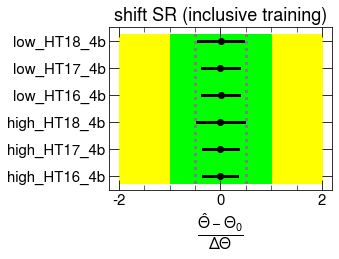

In [9]:
plt.figure(figsize=(4,3))

plt.errorbar(p_base[:6].pull,np.arange(6)[::-1],xerr=p_base[:6].err,
             marker='o',color='k',lw=0,elinewidth=3)

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='yellow')
plt.fill_betweenx(ylim,-1,1,color='lime')


plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('shift SR (inclusive training)')

plt.yticks(np.arange(6),p_base[:6].label)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'grey',ls='dotted')
plt.plot([ 0.5]*2,ylim,'grey',ls='dotted')

plt.savefig(f'{figDir}/pulls_sr_124_117.pdf',bbox_inches='tight')

plt.show()

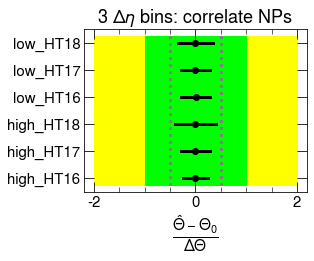

In [10]:
plt.figure(figsize=(4,3))

plt.errorbar(p_3cor[:6].pull,np.arange(6)[::-1],xerr=p_3cor[:6].err,
             marker='o',color='k',lw=0,elinewidth=3)

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='yellow')
plt.fill_betweenx(ylim,-1,1,color='lime')


plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('3 $\Delta \eta$ bins: correlate NPs')

plt.yticks(np.arange(6),p_3cor[:6].label)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'grey',ls='dotted')
plt.plot([ 0.5]*2,ylim,'grey',ls='dotted')

plt.savefig(f'{figDir}/pulls_3_deta_hh_bins_corr_NPs.pdf',bbox_inches='tight')

plt.show()

OK - I think it would be great to actually *overlay* these 2.

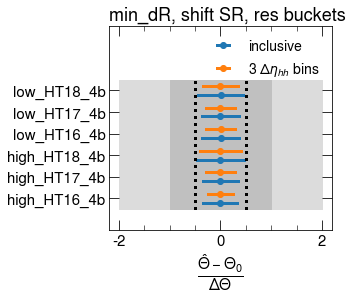

In [11]:
plt.figure(figsize=(4,3.75))

eps = .2

plt.errorbar(p_base[:6].pull,np.arange(6)[::-1]-eps,xerr=p_base[:6].err,
             marker='o',color='C0',lw=0,elinewidth=3,label='inclusive')

plt.errorbar(p_3cor[:6].pull,np.arange(6)[::-1]+eps,xerr=p_3cor[:6].err,
             marker='o',color='C1',lw=0,elinewidth=3,label='3 $\Delta \eta_{hh}$ bins')

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='gainsboro')
plt.fill_betweenx(ylim,-1,1,color='silver')

plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('min_dR, shift SR, res buckets',loc='left')

plt.yticks(np.arange(6),p_base[:6].label)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'k',ls='dotted')
plt.plot([ 0.5]*2,ylim,'k',ls='dotted')

plt.legend(loc='upper right')
plt.ylim(ylim[0]-1,ylim[1]+2.5)

plt.savefig(f'{figDir}/pulls_cf_base_vs_corr_NPs.pdf',bbox_inches='tight')

plt.show()

In [12]:
p_3cor

label    pull     err
0                        high_HT16  0.0014  0.3685
1                        high_HT17 -0.0007  0.3039
2                        high_HT18  0.0024  0.3023
3                         low_HT16 -0.0016  0.4271
4                         low_HT17 -0.0001  0.3071
..                             ...     ...     ...
352  uncorr_bkguncrt18cat_4b_2[34]  0.0000  0.9824
353  uncorr_bkguncrt18cat_4b_2[35] -0.0000  0.9873
354  uncorr_bkguncrt18cat_4b_2[36]  0.0001  0.9767
355  uncorr_bkguncrt18cat_4b_2[37]  0.0000  0.9878
356  uncorr_bkguncrt18cat_4b_2[38]  0.0005  0.9112

[357 rows x 3 columns]

In [13]:
from termcolor import colored


shape: mean=0.407, min=0.357, max=0.489
bs:    mean=0.912, min=0.710, max=0.991
shape: mean=0.330, min=0.268, max=0.427
bs:    mean=0.949, min=0.687, max=0.995
shape: mean=0.534, min=0.375, max=0.899
bs:    mean=0.952, min=0.690, max=0.995
shape: mean=0.504, min=0.251, max=0.898
bs:    mean=0.965, min=0.774, max=0.993


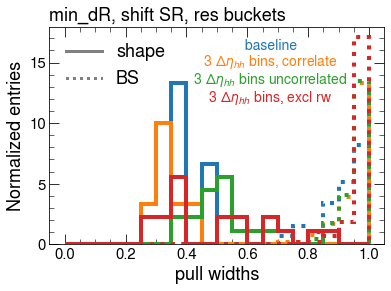

In [16]:
kwargs = {'bins':20,'range':(0,1),'histtype':'step', 'lw':4, 'density':True}

ls = ['baseline',
      '3 $\Delta \eta_{hh}$ bins, correlate',
      '3 $\Delta \eta_{hh}$ bins uncorrelated',
      '3 $\Delta \eta_{hh}$ bins, excl rw']
lc = ['C0','C1','C2','C3']


for p, i, c,tc in zip([p_base,p_3cor,p_3inc,p_3exl],[6,6,18,18],lc,['blue','yellow','green','red']):


    shape = p[:i].err
    bs = p[i:].err
    
    plt.hist(shape,color=c,**kwargs)
    plt.hist(bs,color=c,ls='dotted',**kwargs)

    
    print(colored(f'shape: mean={np.mean(shape):.3f}, min={np.min(shape):.3f}, max={np.max(shape):.3f}',tc))
    print(colored(f'bs:    mean={np.mean(bs):.3f}, min={np.min(bs):.3f}, max={np.max(bs):.3f}',tc))
    
#     plt.hist(p_3cor[:6].err,color='C1',**kwargs)
#     plt.hist(p_3cor[6:].err,color='C1',ls='dotted',**kwargs)

#     plt.hist(p_3inc[:18].err,color='C2',**kwargs)
#     plt.hist(p_3inc[18:].err,color='C2',ls='dotted',**kwargs)

#     plt.hist(p_3exl[:18].err,color='C3',**kwargs)
#     plt.hist(p_3exl[18:].err,color='C3',ls='dotted',**kwargs)

plt.xlabel('pull widths',fontsize=18)
plt.ylabel('Normalized entries',fontsize=18)
plt.title('min_dR, shift SR, res buckets',loc='left')

_,ymax = plt.ylim()
ax = plt.gca()

rainbow_text(.67,ymax-1,ls,lc,yoffset=1,ax=ax, fontsize=14,ha='center',va='top')

for l,ls in zip(['shape','BS'],['-','dotted']):
    plt.plot([],[],color='grey',label=l,ls=ls)
    
plt.legend(loc='upper left',fontsize=18)
 
plt.savefig(f'{figDir}/hist_errs_cf_base_3_deta_bins.pdf',bbox_inches='tight')
    
plt.show()

Hmmmmm - it's a *little* hard for me to compare the 3 bins uncorrleated vs not - so I'm going to overlay the two rn.

In [19]:
deta_map = {
    '2': '1_1.5',
    '1': '0.5_1',
    '0': '0_0.5'
}

In [20]:
plt.figure(figsize=(4,9))

eps = .2

plt.errorbar(p_3inc[:18].pull,np.arange(18)[::-1]-eps,xerr=p_3inc[:18].err,
             marker='o',color='C2',lw=0,elinewidth=3,label='incl rw')

plt.errorbar(p_3exl[:18].pull,np.arange(18)[::-1]+eps,xerr=p_3exl[:18].err,
             marker='o',color='C3',lw=0,elinewidth=3,label='excl rw')

ylim = plt.ylim()
plt.fill_betweenx(ylim,-2,2,color='gainsboro')
plt.fill_betweenx(ylim,-1,1,color='silver')

plt.xlabel(r'$\frac{\hat{\Theta} - \Theta_0}{\Delta \Theta}$',fontsize=22)
plt.title('3 $\Delta \eta$ bins')


ylabels = [yl[:-8]+'deta_'+deta_map[yl[-1]] for yl in p_3inc[:18].label]

plt.yticks(np.arange(18),ylabels)
ax = plt.gca()
ax.tick_params(axis='y',which='minor', length=0)

plt.plot([-0.5]*2,ylim,'k',ls='dotted')
plt.plot([ 0.5]*2,ylim,'k',ls='dotted')

plt.legend(loc='upper right')
plt.ylim(ylim[0]-1,ylim[1]+2.5)

plt.savefig(f'{figDir}/pulls_cf_incl_vs_excl_rw.pdf',bbox_inches='tight')

plt.show()

Ok, cool, this is awesome! I *think* it might even be better to overlay the low and high $H_T$ systematics here as well??

In [21]:
with open(f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-3_bins.json') as f:
    ws_3inc = json.load(f)
    
with open(f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-exl_rw_3_bins.json') as f:
    ws_3exl = json.load(f)

In [22]:
e = np.linspace(225,1200,40)
xx = 0.5*(e[1:]+e[:-1])

In [23]:
fig,axes = plt.subplots(3,3,figsize=(18,15))

deta_titles = [
    '$\Delta \eta_{hh}$ < 0.5',
    '0.5 < $\Delta \eta_{hh}$ < 1',
    '1 < $\Delta \eta_{hh}$ < 1.5'
]

for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):
    
    for j,ax,title in zip(range(3),ax_row,deta_titles):
            
        if i == 2:
            ax.set_title(title)
        
        k = i*3+j
        
        for ws, c,l in zip([ws_3inc, ws_3exl],['C2','C3'],['inc','excl']):
            
            
            bkg = ws['channels'][k]['samples'][1]
            assert bkg['name']  == f'background{yr}cat_4b_{j}'
    
            nom = np.array(bkg['data'])
        
            low_HT, high_HT = bkg['modifiers'][1:]
            for syst,ls,ht_reg in zip([low_HT,high_HT],['--','-'],['low','high']):
                
                ax.plot(xx,np.array(syst['data']['lo_data'])/nom,color=c,ls=ls,label=f'{ht_reg} $H_T$ {l}')
                ax.plot(xx,np.array(syst['data']['hi_data'])/nom,color=c,ls=ls)
        
        ax.set_xlabel('$m_{hh}$ [GeV]')
        ax.set_ylabel('var / nom')
        ax.text(.5,.05,ws['channels'][k]['name'],ha='center',va='bottom',transform=ax.transAxes)
        
axes[0,-1].legend(fontsize=24,bbox_to_anchor=(1,1.03))
 
plt.savefig(f'{figDir}/bmods_cf_incl_vs_excl_rw.pdf',bbox_inches='tight')
    
plt.show()

**For completeness - let's compare S+B too**

In [25]:


for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):
    
    b_tot = 0
    
    
    for j,ax,title in zip(range(3),ax_row,deta_titles):
            
        if i == 2:
            ax.set_title(title)
        
        k = i*3+j
                
        # Draw the backgrounds
        for ws, c,l in zip([ws_3inc, ws_3exl],['C2','C3'],['incl rw','exl rw']):
            
            
            bkg = ws['channels'][k]['samples'][1]
            assert bkg['name']  == f'background{yr}cat_4b_{j}'
    
            nom = bkg['data']
        
            b_tot += sum(nom[6:])
        
            ax.plot(xx,nom,c,label=l)
        
        # Overlay the signal
        sig = ws['channels'][k]['samples'][0]
        assert sig['name']  == f'signal{yr}cat_4b_{j}'

        s_hist = sig['data']

        scale = 100
        ax.plot(xx,scale * np.array(s_hist),'rebeccapurple',label=f'{scale} x SM NR')
        
        
        ax.set_xlabel('$m_{hh}$ [GeV]')
        ax.set_ylabel('Entries')
        ax.legend(loc='upper right',bbox_to_anchor=(.98,.9))
        
        ax.text(.95,.95,ws['channels'][k]['name'],ha='right',va='top',transform=ax.transAxes)

    print(yr,b_tot)
plt.savefig(f'{figDir}/s_b_hists_cf_incl_vs_excl_rw.pdf',bbox_inches='tight')       
plt.show()

16 4242.618764148713
17 5847.045703204093
18 10273.255198537208


### Correlations

In [ ]:
%%bash
ls ../stats-results/dEta_cats/ws*_correlations.csv

In [ ]:
from statUtils import plotCorrelation

In [ ]:
cFiles = [
    f'{pullDir}/ws-systs-HTcut-300.0-16-17-18-SM-HH-baseline_correlations.csv',
    f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-3_bins_correlations.csv',
    f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-corr-16-17-18-SM-HH-3_bins_correlations.csv',
    f'{pullDir}/ws-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-exl_rw_3_bins_correlations.csv'
]

In [ ]:
titles = ['shift SR, inclusive rw, res buckets',
          '3 $\Delta \eta_{hh}$ bins, inclusive rw',
          '3 $\Delta \eta_{hh}$ bins, inclusive rw, correlate NP',
          '3 $\Delta \eta_{hh}$ bins, rw each cat separately']

tags = [
    'shift_SR',
    '3_deta_hh_bins_incl_rw_sep_NPs',
    '3_deta_hh_bins_corr_NPs',
    '3_deta_hh_bins_exl_rw'
]

for cFile,title,tag in zip(cFiles,titles,tags):
    plotCorrelation(cFile,title,figDir=figDir,tag=tag)